# Ejercicio 1
Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver material de apoyo PCA).


## Desarrollo:
Principal components analysis se puede entender desde la perspectiva de un modelo generativo (reconstrucción de los datos), donde el objetivo es lograr a partir de un producto lineal reconstruir los dtos originales lo mejor posible.

Dado:


* Conjunto de datos $\mathbf{X} \in \mathbb{R}^{n\times d}$ centrado (media $0$).

Queremos encontrar una proyección Lineal $\mathbf{W}\in \mathbb{R}^{d\times k}$, donde $k < d$ (reducción en el número de características) de tal moto que exista una reconstrucción:

$$ \hat{X} =  ZW^T$$

Donde:

$$ Z = XW $$

Siendo $Z$ la representación de baja dimensión.

El objetivo es entonces minimizar el error de reconstrucción:

$$ \min_{W \in \mathbb{R}^{d \times k}, \; W^\top W = I_k} \; \| X - XWW^\top \|_F^2 $$

Buscando así minimizar el error cuadríatico normal, encontrando entonces una base ortonormal de dimensión $k$, tal que al proyectar y luego reconstruir los datos, se minimice la pérdida de información.

### Comparativa entre PCA como modelo generativo y como preservación de varianza

| Aspecto                         | **Perspectiva Generativa**                              | **Preservación de la Varianza**                      |
|---------------------------------|----------------------------------------------------------|------------------------------------------------------|
| **Objetivo**                    | Minimizar el error de reconstrucción                     | Maximizar la varianza retenida en el subespacio      |
| **Función objetivo**            | $\min \| X - XWW^\top \|_F^2$                        | $\max \operatorname{Tr}(W^\top S W) $             |
| **Interpretación**              | Proyectar y reconstruir los datos con mínima pérdida     | Encontrar las direcciones de mayor dispersión        |
| **Resultado**                   | Subespacio que mejor reconstruye los datos originales    | Subespacio que retiene la mayor parte de la varianza|
| **Tipo de problema**            | Minimización del error cuadrático                        | Maximización de la varianza                          |
| **Naturaleza del modelo**       | Enfoque generativo (similar a autoencoder lineal)        | Enfoque estadístico clásico                          |
| **Equivalencia matemática**     | Sí, ambos conducen a los mismos autovectores principales | Sí, son formulaciones duales del mismo problema      |



# Ejercicio 2:

resente un paralelo entre el problema de optimización de PCA y el de Kernel PCA:

## PCA:
Encontrar una proyección lineal de los datos que preserve la máxima varianza o permita una reconstrucción óptima.

$$ \max_{||\omega||=1} Var(X\omega) = \omega^tS\omega $$

Donde $S = \frac{1}{n} X^T X$ es la matriz de covarianza.

Por lo tanto la solución son los autovectores de S asociados a los autovalores más grandes.

## Kernel PCA

En kPCA se busca capturar estructuras no lineales que PCA no puede representar adecuadamente, por lo tanto se aplica PCA en el espacio original sino en un espacio de características no lineales usando una función $\phi(x)$.

En lugar de calcular explícitamente $\phi(x)$, se utiliza un kernel para aprovechar sus ventajas.

Finalmente, el problema de optimización queda planteado del siguiente modo:
Sea

$\Phi = [\phi(x_1), ..., \phi(x_n)]$

$$ \max_{||v||=1} Var(\Phi v) = v^T \Phi^T \Phi v $$

Finalmente, este problema se resuelve mediante el espectro de la matiz de gram centrada:

$$ K_{ij} =  \tilde(K) = K - 1K - K1 + 1K1 $$

Siendo la solución los vectores propios de $\tilde{K}$.

## Resumen

| **Aspecto**                   | **PCA**                                                                 | **Kernel PCA (kPCA)**                                                   |
|------------------------------|--------------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Naturaleza**               | Lineal                                                                  | No lineal                                                              |
| **Espacio de trabajo**       | Espacio original $ \mathbb{R}^d $                                      | Espacio de características $ \mathcal{F} $, implícito vía kernel     |
| **Transformación**           | Proyección lineal: $ Z = XW $                                          | Proyección no lineal: $ Z = \Phi(X) \alpha $                         |
| **Matriz usada**             | Matriz de covarianza: $ S = \frac{1}{n} X^\top X $                     | Matriz de Gram: $ K_{ij} = k(x_i, x_j) $                             |
| **Objetivo (varianza)**      | Maximizar $ \operatorname{Tr}(W^\top S W) $                            | Maximizar varianza en espacio de características                       |
| **Solución**                 | Autovectores de $ S $                                                  | Autovectores de $ \tilde{K} $, la matriz de kernel centrada          |
| **Requerimiento de linealidad** | Sí                                                                      | No (permite relaciones no lineales)                                    |
| **Reconstrucción**           | Directa: $ \hat{X} = XWW^\top $                                        | Indirecta y no trivial (requiere estimación de preimagen)              |
| **Costo computacional**      | Eficiente si $ d $ es pequeño                                          | Costoso para grandes $ n $ (se diagonaliza $ K \in \mathbb{R}^{n \times n} $) |
| **Kernel trick**             | No aplica                                                               | Sí, permite trabajar sin calcular $ \phi(x) $ explícitamente         |
| **Aplicaciones típicas**     | Compresión, visualización lineal                                        | Clustering no lineal, separación compleja, reconocimiento facial       |

---


# Ejercicio 3:
Consulte en que consiste el algoritmo eigenfaces. Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto X_train y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

## Desarrollo


El algoritmo Eigenfaces es un método de reconocimiento facial basado en PCA (Análisis de Componentes Principales), propuesto por primera vez por Turk y Pentland en 1991. Utiliza una representación de rostros en un subespacio reducido definido por los vectores propios (eigenvectors) de la matriz de covarianza de un conjunto de imágenes faciales.

La idea es representar cualquier rostro como una combinación lineal de un conjunto reducido de "rostros base" llamados eigenfaces, que son las componentes principales del conjunto de imágenes faciales.

El paso a paso consiste en:
* Aplanar las imagenes para que queden apilados en filas o columnas.
* Se calcula la imagen media.
* Se resta cad imagen restándole la imagen promedio.
* Sobre el conjunto de datos resultantes se aplica PCA.
* Finalmente se proyecta cualquiera de las imagenes en el espacio reducido.

Como tal Eigenfaces es una aplicación directa de PCA a un problema de reconocimmiento facial.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


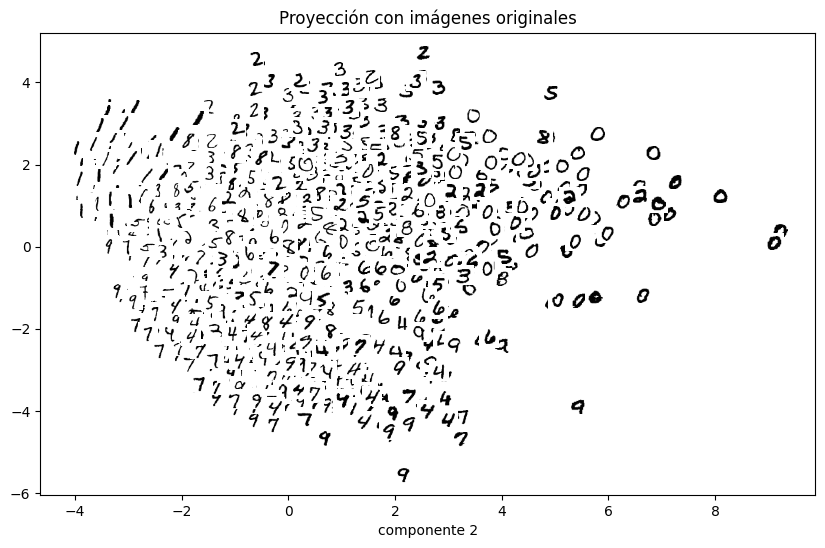

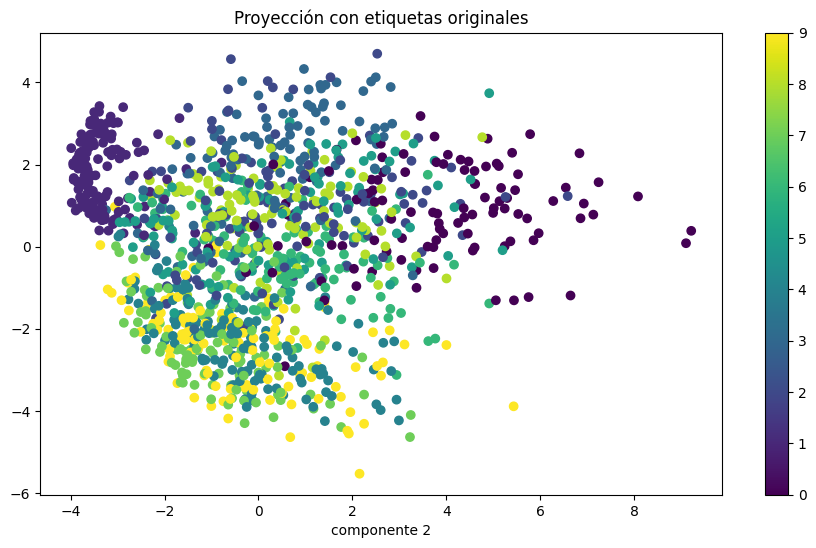

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)


#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)

#graficar 2D con imágenes originales
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

In [2]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)

(80, 784)


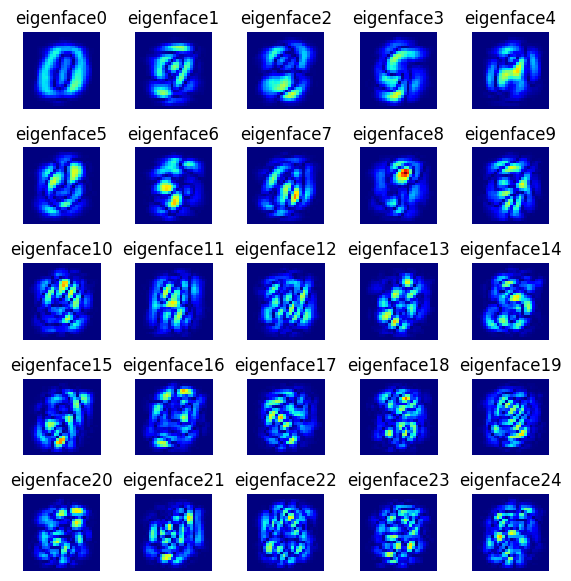

In [3]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.4))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

Utilizando la base de datos muestreada Mnist en X_train y y_train, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería RAPIDS a la hora de implementar los algoritmos, en caso de estar disponibles.

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


[2025-06-12 17:26:09.908] [CUML] [info] Building knn graph using brute force

Comparativa de coeficiente de silueta:

                  Coef. Silueta
Kernel PCA (RBF)       0.715172
UMAP                   0.482411
PCA                    0.333359
t-SNE                  0.251634


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


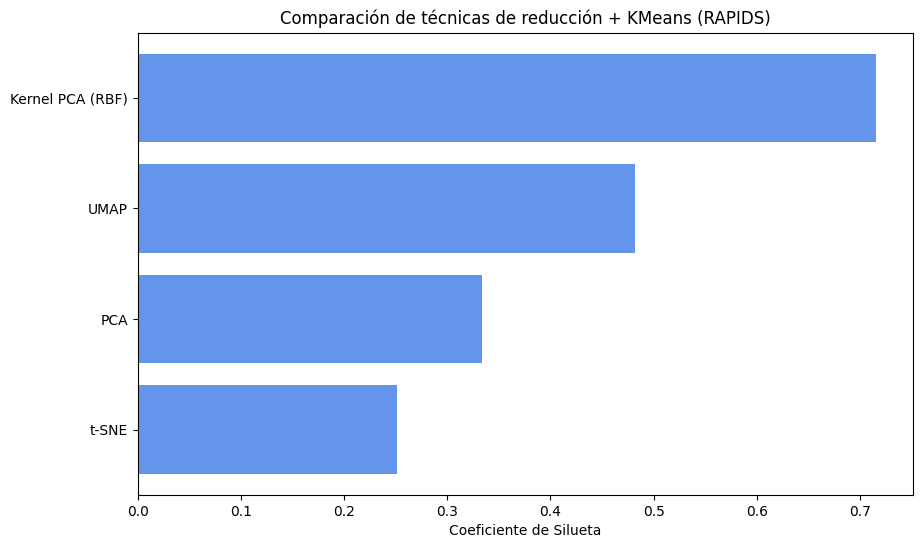

In [7]:
# Importación de librerías RAPIDS y clásicas
import cuml
from cuml.decomposition import PCA
from sklearn.decomposition import KernelPCA
from cuml.cluster import KMeans
from cuml.manifold import TSNE, UMAP

from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import cupy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Estandarizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Convertir a GPU
X_gpu = cp.asarray(X_train)

# Diccionario para almacenar resultados
results = {}

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_gpu)
kmeans_pca = KMeans(n_clusters=10)
labels_pca = kmeans_pca.fit_predict(X_pca)
sil_pca = silhouette_score(cp.asnumpy(X_pca), cp.asnumpy(labels_pca))
results['PCA'] = sil_pca

# --- Kernel PCA (RBF) ---
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_gpu.get())
kmeans_kpca = KMeans(n_clusters=10)
labels_kpca = kmeans_kpca.fit_predict(X_kpca)
sil_kpca = silhouette_score(cp.asnumpy(X_kpca), cp.asnumpy(labels_kpca))
results['Kernel PCA (RBF)'] = sil_kpca

# --- t-SNE ---
tsne = TSNE(n_components=2, n_iter=1000, perplexity=30)
X_tsne = tsne.fit_transform(X_gpu)
kmeans_tsne = KMeans(n_clusters=10)
labels_tsne = kmeans_tsne.fit_predict(X_tsne)
sil_tsne = silhouette_score(cp.asnumpy(X_tsne), cp.asnumpy(labels_tsne))
results['t-SNE'] = sil_tsne

# --- UMAP ---
umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
X_umap = umap.fit_transform(X_gpu)
kmeans_umap = KMeans(n_clusters=10)
labels_umap = kmeans_umap.fit_predict(X_umap)
sil_umap = silhouette_score(cp.asnumpy(X_umap), cp.asnumpy(labels_umap))
results['UMAP'] = sil_umap

# --- Mostrar resultados ---
df = pd.DataFrame.from_dict(results, orient='index', columns=['Coef. Silueta'])
df = df.sort_values('Coef. Silueta', ascending=False)

print("\nComparativa de coeficiente de silueta:\n")
print(df)

# --- Visualización (opcional) ---
plt.figure(figsize=(10, 6))
plt.barh(df.index, df['Coef. Silueta'], color='cornflowerblue')
plt.xlabel("Coeficiente de Silueta")
plt.title("Comparación de técnicas de reducción + KMeans (RAPIDS)")
plt.gca().invert_yaxis()
plt.show()